# Mejorar entrenamiento con data augmentation. 

Keras proporciona la clase ImageDataGenerator que define la configuración para la preparación y el aumento de los datos de imagen. Esto incluye capacidades como:

* Estandarización de características.
* Blanqueo ZCA.
* Rotación, desplazamiento, cizallamiento y volteo aleatorios.
* Reordenación de las dimensiones.
* Guarda las imágenes aumentadas en el disco.

Para crear un generador de augmented image ocupamos la siguente linea:  

* datagen = ImageDataGenerator()

Después de haber creado el ImageDataGenerator(), se debe ajustar a nuestros datos.

* datagen.fit(train)

El generador de datos es un iterador que devuelve lotes de imágenes si es que se quiere. 
Podemos configurar el tamaño del lote y preparar el generador de datos llamando a la función flow() que devuelve lotes de imagenes.


* X_batch, y_batch = datagen.flow(train, train, batch_size=32)

Para hacer uso del generador de datos llamamos a la función a fit_generator() y pasar la longitud deseada de una época, así como el número total de épocas en las que entrenar.

* fit_generator(datagen, samples_per_epoch=len(train), nb_epoch=100)

## Punto de comparación para el data augmentation. 

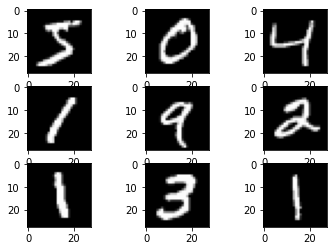

In [8]:
# Plot of images as baseline for comparison
from keras.datasets import mnist
from matplotlib import pyplot
# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# create a grid of 3x3 images
for i in range(0, 9):
    pyplot.subplot(331 + i)
    pyplot.imshow(X_train[i], cmap=pyplot.get_cmap( "gray" ))
    # show the plot
pyplot.show()

## Estandarización de características

In [9]:
from keras.preprocessing.image import ImageDataGenerator

# reshape to be [samples][pixels][width][height]
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)
# convert from int to float
X_train = X_train.astype( "float32" )
X_test = X_test.astype( "float32" )



In [3]:
print(type(X_train),X_train.shape)

<class 'numpy.ndarray'> (60000, 28, 28, 1)


* Normalización de píxeles: escalar los valores de los píxeles al rango 0-1.

* Centrado de píxeles: escalar los valores de los píxeles para que tengan una media cero.

* Estandarización de píxeles: escala los valores de los píxeles para que tengan una media cero y una varianza unitaria.

In [1]:
#help(ImageDataGenerator)

In [5]:
# define data preparation
datagen = ImageDataGenerator(featurewise_center=True,
                            featurewise_std_normalization=True)


In [6]:
# fit parameters from data
datagen.fit(X_train)

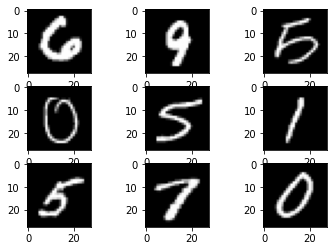

In [7]:
# configure batch size and retrieve one batch of images
for X_batch, y_batch in datagen.flow(X_train, y_train, batch_size=9):
    # create a grid of 3x3 images
    for i in range(0, 9):
        pyplot.subplot(330 + 1 + i)
        pyplot.imshow(X_batch[i].reshape(28, 28), cmap=pyplot.get_cmap("gray"))
        # show the plot
    pyplot.show()
    break

##  Blanqueamiento ZCA.

Reduce la redundancia en la matriz de imágenes de píxeles. Esta reducción de la redundancia en la imagen tiene como objetivo resaltar mejor las estructuras y características de la imagen para el algoritmo de aprendizaje. Normalmente, el blanqueo de imágenes se realiza mediante la técnica de Análisis de Componentes Principales (PCA). Más recientemente, una alternativa llamada ZCA muestra mejores resultados y da lugar a imágenes transformadas que mantienen todas las dimensiones originales y, a diferencia del PCA, las imágenes transformadas resultantes siguen pareciendo sus originales.

In [10]:
datagen2 = ImageDataGenerator(zca_whitening=True)
datagen2.fit(X_train)

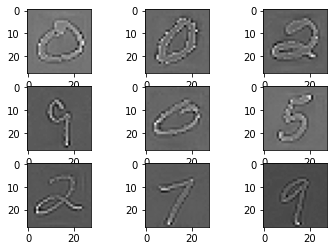

In [11]:
for X_batch, y_batch in datagen2.flow(X_train, y_train, batch_size=9):
    # create a grid of 3x3 images
    for i in range(0, 9):
        pyplot.subplot(330 + 1 + i)
        pyplot.imshow(X_batch[i].reshape(28, 28), cmap=pyplot.get_cmap( "gray"))
        # show the plot
    pyplot.show()
    break

## Rotaciones random.

No siempre uno escribe los numeros de forma recta por lo que es muy ultil tener un generador de imagenes que me permita cubrir esos casos.

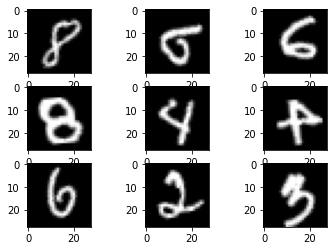

In [13]:
datagen3 = ImageDataGenerator(rotation_range=90)
# fit parameters from data
datagen3.fit(X_train)
# configure batch size and retrieve one batch of images
for X_batch, y_batch in datagen3.flow(X_train, y_train, batch_size=9):
# create a grid of 3x3 images
    for i in range(0, 9):
        pyplot.subplot(330 + 1 + i)
        pyplot.imshow(X_batch[i].reshape(28, 28), cmap=pyplot.get_cmap( "gray" ))
    # show the plot
    pyplot.show()
    break


##  Random Shifts 

Las imagenes no siempre estaran centradas, en algunas ocaciones estaran en los bordes tanto superiores como inferiores y para cubrir estos casos esta width_shift_range y height_shift_range. 

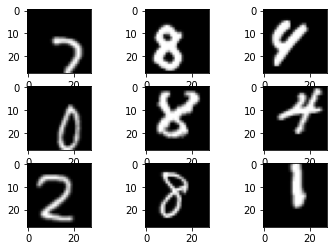

In [16]:
shift = 0.2
datagen4 = ImageDataGenerator(width_shift_range=shift, height_shift_range=shift)

datagen4.fit(X_train)

for X_batch, y_batch in datagen4.flow(X_train, y_train, batch_size=9):
# create a grid of 3x3 images
    for i in range(0, 9):
        pyplot.subplot(330 + 1 + i)
        pyplot.imshow(X_batch[i].reshape(28, 28), cmap=pyplot.get_cmap( "gray" ))
    # show the plot
    pyplot.show()
    break

## Random Flips 

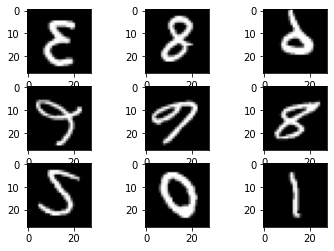

In [17]:
datagen5 = ImageDataGenerator(horizontal_flip=True, vertical_flip=True)
# fit parameters from data
datagen5.fit(X_train)
for X_batch, y_batch in datagen5.flow(X_train, y_train, batch_size=9):
# create a grid of 3x3 images
    for i in range(0, 9):
        pyplot.subplot(330 + 1 + i)
        pyplot.imshow(X_batch[i].reshape(28, 28), cmap=pyplot.get_cmap( "gray" ))
    # show the plot
    pyplot.show()
    break

No se si esta tecnica sea muy efectiva para el problema que estamos resolviendo. 


## Guardar imagenes.



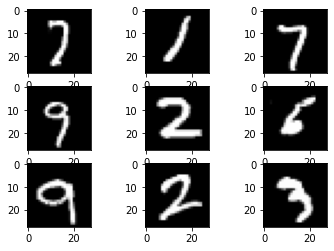

In [21]:
import os 
datagen6 = ImageDataGenerator()
# fit parameters from data
datagen6.fit(X_train)
# configure batch size and retrieve one batch of images
os.makedirs( "images" )
for X_batch, y_batch in datagen6.flow(X_train, y_train, batch_size=9, save_to_dir= "images" ,
                                        save_prefix= "aug" , save_format= "png" ):
    # create a grid of 3x3 images
    for i in range(0, 9):
        pyplot.subplot(330 + 1 + i)
        pyplot.imshow(X_batch[i].reshape(28, 28), cmap=pyplot.get_cmap( "gray" ))
    # show the plot
    pyplot.show()
    break

el unico problema es que no se donde queda guardado los valores del vector y

(explicito del libro)

Tips For Augmenting Image Data with Keras
 

* **Revisar el conjunto de datos**. Tómese un tiempo para revisar su conjunto de datos con gran detalle. Observe las imágenes. Tome nota de la preparación de la imagen y los aumentos que podrían beneficiar el proceso de entrenamiento de su modelo, como la necesidad de manejar di↵erentes desplazamientos, rotaciones o giros de los objetos en la escena. 

* **Revise los aumentos**. Revise las imágenes de muestra después de haber realizado el aumento. Una cosa es saber intelectualmente qué transformaciones de imagen se están utilizando, y otra muy distinta es ver ejemplos. Revise las imágenes tanto con los aumentos individuales que está utilizando como con el conjunto completo de aumentos que planea utilizar en conjunto. Puede ver formas de simplificar o mejorar aún más su proceso de entrenamiento del modelo. 

* **Evalúe un conjunto de transformaciones.** Pruebe más de un esquema de preparación de datos de imagen y aumento. A menudo puede sorprenderse de los resultados de un esquema de preparación de datos que no pensaba que sería beneficioso.